# A Long time ago in a galaxy far, far away.... A disturbance in ML was felt.




### Data and inspiration drawn from: https://github.com/lemoinef/Star-Wars-Survey/

## Input and visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import sklearn

In [2]:
input_df = pd.read_csv("https://raw.githubusercontent.com/lemoinef/Star-Wars-Survey/master/star_wars.csv")


In [3]:
star_wars = input_df.copy(deep=True)
# Remove NaN values from 'RespondentID' column.
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]


for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?",
    'Are you familiar with the Expanded Universe?',
    'Do you consider yourself to be a fan of the Expanded Universe?æ',
    'Do you consider yourself to be a fan of the Star Trek franchise?'
    ]:
    star_wars[col] = star_wars[col].map({"Yes": True, "No": False})


movie_mapping = {
"Star Wars: Episode I  The Phantom Menace": True,
np.nan: False,
"Star Wars: Episode II  Attack of the Clones": True,
"Star Wars: Episode III  Revenge of the Sith": True,
"Star Wars: Episode IV  A New Hope": True,
"Star Wars: Episode V The Empire Strikes Back": True,
"Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)


star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6",
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6",
        "Unnamed: 16": "Han Solo",
        "Unnamed: 17" : "Luke Skywalker",
        "Unnamed: 18" : "Princess Leia",
        "Unnamed: 19" : "Anakin Skywalker",
        "Unnamed: 20" : "Obi Wan Kenobi",
        "Unnamed: 21" : "Emperor Palpatine",
        "Unnamed: 22" : "Darth Vader",
        "Unnamed: 23" : "Lando Calrissian",
        "Unnamed: 24" : "Boba Fett",
        "Unnamed: 25" : "C-3PO",
        "Unnamed: 26" : "Jar Jar Binks",
        "Unnamed: 27" : "Queen Amidala",
        "Unnamed: 28" : "Yoda",
        "Do you consider yourself to be a fan of the Expanded Universe?æ" : "Do you consider yourself to be a fan of the Expanded Universe?"

        })

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Han Solo', 'Luke Skywalker', 'Princess Leia', 'Anakin Skywalker',
       'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader',
       'Lando Calrissian', 'Boba Fett', 'C-3PO', 'Jar Jar Binks',
       'Queen Amidala', 'Yoda', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Regi

### Let's predict a binary outcome. Is Empire Strikes Back the best movie?

### We'll use:
1) Do you consider yourself to be a fan of the Expanded Universe?
2) Do you consider yourself to be a fan of the Star Wars film franchise?
3) Do you consider yourself to be a fan of the Star Trek franchise?
4) Gender 
5) Age
6) Household Income
7) Education
8) Location (Census Region)
9) Which character shot first?

### First let's make an analysis df and drop the NA's

In [52]:
star_wars_analysis = star_wars.copy(deep = True)[['Do you consider yourself to be a fan of the Expanded Universe?',\
                                                  'Do you consider yourself to be a fan of the Star Wars film franchise?',\
                                                  'Do you consider yourself to be a fan of the Star Trek franchise?',\
                                                  'Gender',\
                                                  'Age',\
                                                  'Household Income',\
                                                  'Education',\
                                                  'Location (Census Region)',\
                                                  'Which character shot first?',\
                                                  'Han Solo', 'Luke Skywalker', 'Princess Leia', 'Anakin Skywalker', 'Yoda', 'Darth Vader', 'Boba Fett',
                                                  'ranking_5']]

In [53]:
star_wars_analysis.isna().sum()
##Wow! let's drop that first column!
#Then we'll remove all rows that don't have a ranking. Be careful!! Why is this dangerous?

Do you consider yourself to be a fan of the Expanded Universe?           973
Do you consider yourself to be a fan of the Star Wars film franchise?    350
Do you consider yourself to be a fan of the Star Trek franchise?         118
Gender                                                                   140
Age                                                                      140
Household Income                                                         328
Education                                                                150
Location (Census Region)                                                 143
Which character shot first?                                              358
Han Solo                                                                 355
Luke Skywalker                                                           355
Princess Leia                                                            363
Anakin Skywalker                                                         361

In [54]:
star_wars_analysis_clean = star_wars_analysis\
                            .drop(columns = ['Do you consider yourself to be a fan of the Expanded Universe?'])\
                            .dropna()


In [55]:
star_wars_analysis_clean["5IsBest"] = [1 if x == '1' else 0 for x in star_wars_analysis_clean['ranking_5']]
star_wars_analysis_clean


,Do you consider yourself to be a fan of the Star Wars film franchise?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region),Which character shot first?,Han Solo,Luke Skywalker,Princess Leia,Anakin Skywalker,Yoda,Darth Vader,Boba Fett,ranking_5,5IsBest
3,False,False,Male,18-29,"$0 - $24,999",High school degree,West North Central,I don't understand this question,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),5,0
4,True,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,I don't understand this question,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,4,0
5,True,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,Greedo,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,1,1
6,True,True,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic,Han,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,5,0
9,True,False,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic,Han,Somewhat unfavorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,True,False,Female,45-60,"$0 - $24,999",Some college or Associate degree,Pacific,Han,Very favorably,Very favorably,Somewhat favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,1,1
1182,True,True,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central,Han,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,2,0
1183,True,True,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain,I don't understand this question,Somewhat favorably,Very favorably,Somewhat unfavorably,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,3,0
1185,True,True,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central,Han,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,2,0


In [56]:
star_wars_analysis_clean = star_wars_analysis_clean.drop(columns = ['ranking_5'])
star_wars_analysis_clean

,Do you consider yourself to be a fan of the Star Wars film franchise?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region),Which character shot first?,Han Solo,Luke Skywalker,Princess Leia,Anakin Skywalker,Yoda,Darth Vader,Boba Fett,5IsBest
3,False,False,Male,18-29,"$0 - $24,999",High school degree,West North Central,I don't understand this question,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),0
4,True,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,I don't understand this question,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,0
5,True,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,Greedo,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,1
6,True,True,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic,Han,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,0
9,True,False,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic,Han,Somewhat unfavorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,True,False,Female,45-60,"$0 - $24,999",Some college or Associate degree,Pacific,Han,Very favorably,Very favorably,Somewhat favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,1
1182,True,True,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central,Han,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,0
1183,True,True,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain,I don't understand this question,Somewhat favorably,Very favorably,Somewhat unfavorably,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,0
1185,True,True,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central,Han,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,0


In [57]:
np.unique(star_wars_analysis_clean['Yoda'])

array(['Neither favorably nor unfavorably (neutral)',
       'Somewhat favorably', 'Somewhat unfavorably', 'Unfamiliar (N/A)',
       'Very favorably', 'Very unfavorably'], dtype=object)

In [58]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
le = LabelEncoder()
star_wars_analysis_clean['SexB'] = le.fit_transform(star_wars_analysis_clean['Gender'])

enc = OrdinalEncoder(categories=[['18-29', '30-44', '45-60', '> 60']])
star_wars_analysis_clean['AgeOrd'] = enc.fit_transform(pd.DataFrame(star_wars_analysis_clean['Age']))

enc = OrdinalEncoder(categories=[['$0 - $24,999', '$25,000 - $49,999', '$50,000 - $99,999', '$100,000 - $149,999', '$150,000+']])
star_wars_analysis_clean['IncomeOrd'] = enc.fit_transform(pd.DataFrame(star_wars_analysis_clean['Household Income']))

enc = OrdinalEncoder(categories=[['Less than high school degree', 'High school degree', 'Some college or Associate degree', 'Bachelor degree',\
                                   'Graduate degree']])
star_wars_analysis_clean['EduOrd'] = enc.fit_transform(pd.DataFrame(star_wars_analysis_clean['Education']))

star_wars_analysis_clean['LocationEnc'] = le.fit_transform(star_wars_analysis_clean['Location (Census Region)'])

star_wars_analysis_clean['ShotFirstEnc'] = le.fit_transform(star_wars_analysis_clean['Which character shot first?'])

for i in ['Han Solo', 'Luke Skywalker', 'Princess Leia', 'Anakin Skywalker', 'Yoda', 'Darth Vader','Boba Fett']:
    enc = OrdinalEncoder(categories=[['Unfamiliar (N/A)','Very unfavorably', 'Somewhat unfavorably', 'Neither favorably nor unfavorably (neutral)','Somewhat favorably',\
                                   'Very favorably']])
    star_wars_analysis_clean[i+'Enc'] = le.fit_transform(star_wars_analysis_clean[i])


In [59]:
star_wars_analysis_clean

,Do you consider yourself to be a fan of the Star Wars film franchise?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region),Which character shot first?,Han Solo,Luke Skywalker,...,EduOrd,LocationEnc,ShotFirstEnc,Han SoloEnc,Luke SkywalkerEnc,Princess LeiaEnc,Anakin SkywalkerEnc,YodaEnc,Darth VaderEnc,Boba FettEnc
3,False,False,Male,18-29,"$0 - $24,999",High school degree,West North Central,I don't understand this question,Somewhat favorably,Somewhat favorably,...,1.0,7,2,1,1,1,1,3,3,3
4,True,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,I don't understand this question,Very favorably,Very favorably,...,2.0,7,2,4,4,4,4,4,1,4
5,True,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,Greedo,Somewhat favorably,Somewhat favorably,...,2.0,7,0,1,1,2,4,1,0,1
6,True,True,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic,Han,Very favorably,Very favorably,...,3.0,2,1,4,4,4,4,4,0,1
9,True,False,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic,Han,Somewhat unfavorably,Somewhat favorably,...,2.0,6,1,2,1,1,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,True,False,Female,45-60,"$0 - $24,999",Some college or Associate degree,Pacific,Han,Very favorably,Very favorably,...,2.0,5,1,4,4,1,4,4,1,4
1182,True,True,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central,Han,Somewhat favorably,Somewhat favorably,...,2.0,0,1,1,1,1,4,4,1,4
1183,True,True,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain,I don't understand this question,Somewhat favorably,Very favorably,...,3.0,3,2,1,4,2,4,4,1,1
1185,True,True,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central,Han,Neither favorably nor unfavorably (neutral),Very favorably,...,2.0,0,1,0,4,4,4,4,1,1


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(star_wars_analysis_clean[['SexB','AgeOrd','IncomeOrd','EduOrd','LocationEnc','ShotFirstEnc',
                                                                              'Do you consider yourself to be a fan of the Star Wars film franchise?',
                                                                              'Darth VaderEnc']],
                                                    star_wars_analysis_clean['5IsBest'],
                                                     test_size=0.2)

In [114]:
X_train

,SexB,AgeOrd,IncomeOrd,EduOrd,LocationEnc,ShotFirstEnc,Do you consider yourself to be a fan of the Star Wars film franchise?,Darth VaderEnc
367,0,3.0,0.0,3.0,6,2,False,1
267,0,0.0,3.0,2.0,0,1,True,4
875,0,2.0,1.0,2.0,8,2,False,1
188,0,0.0,2.0,2.0,8,1,True,0
369,1,3.0,3.0,3.0,8,2,False,1
...,...,...,...,...,...,...,...,...
757,0,3.0,0.0,2.0,0,2,False,3
1114,0,0.0,2.0,2.0,7,1,True,0
300,0,0.0,0.0,4.0,0,2,False,3
1012,0,3.0,0.0,4.0,5,2,False,3


#### Random Forest Classifier

Accuracy: 0.609375


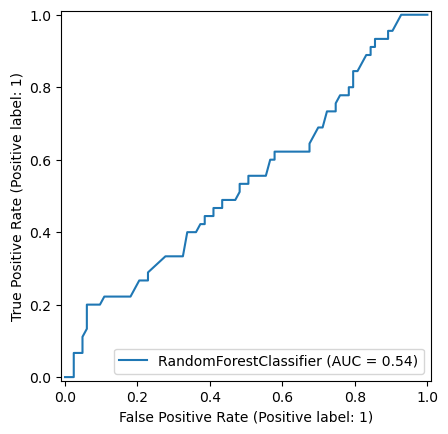

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay


clf_rf = RandomForestClassifier(n_estimators = 100)  
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

print("Accuracy: " + str(metrics.accuracy_score(y_test, y_pred_rf)))

rf_disp = RocCurveDisplay.from_estimator(clf_rf, X_test, y_test)


### Logistic Regression Classifier



Accuracy: 0.609375


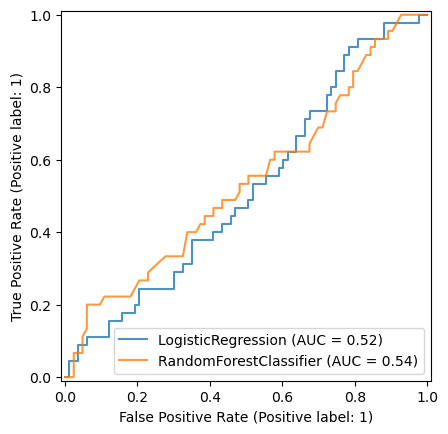

In [113]:
from sklearn.linear_model import LogisticRegression
clf_logit = LogisticRegression(random_state=42)
clf_logit.fit(X_train, y_train)
y_pred_logit = clf_logit.predict(X_test)

print("Accuracy: " + str(metrics.accuracy_score(y_test, y_pred_rf)))

ax = plt.gca()
logit_disp = RocCurveDisplay.from_estimator(clf_logit, X_test, y_test, ax = ax, alpha = 0.8)
rf_disp.plot(ax=ax,alpha = 0.8)

### Playing with Pipes!

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pipe = Pipeline([('scaler', StandardScaler()), ('dim_reduction', PCA(n_components= 8)), ('RFC_Pipe', RandomForestClassifier(n_estimators=100))])
pipe.fit(X_train, y_train).score(X_test, y_test)


0.6171875

### Multiple Plots

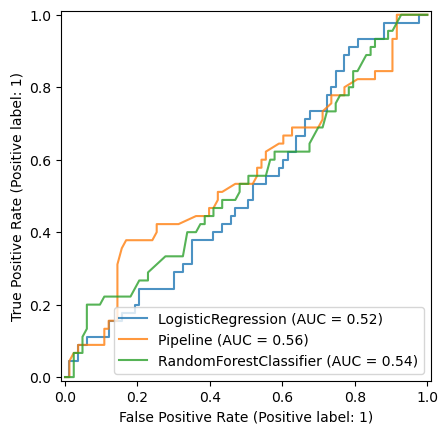

In [133]:
ax = plt.gca()
logit_disp = RocCurveDisplay.from_estimator(clf_logit, X_test, y_test, ax = ax, alpha = 0.8)
rf_disp_pipe = RocCurveDisplay.from_estimator(pipe, X_test, y_test, ax=ax, alpha = 0.8 )
rf_disp.plot(ax=ax,alpha = 0.8)

### Saving & Loading the model

In [136]:
from joblib import dump, load
import os

dump(pipe, os.path.expanduser("~/OSURepos/gradtda5622/course_materials/sync_class/pipe_rf_clf.joblib"))

['/Users/greg.ryslik/OSURepos/gradtda5622/course_materials/sync_class/pipe_rf_clf.joblib']

In [137]:
new_clf = load(os.path.expanduser("~/OSURepos/gradtda5622/course_materials/sync_class/pipe_rf_clf.joblib")) 

In [138]:
new_clf.score(X_test, y_test)

0.6171875